# AUC Analysis
Notebook to plot and understand the Area Under Curve for Precision Recall and Receiver operating Characteristic for the given models.

In [35]:
# Import section
import json
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
# Global Constants
PATH_TO_RESULTS = "../results"

In [26]:
def plot_auc_pr(model: str, label: str, filename: str, pr_auc: float) -> None:
    with open(os.path.join(PATH_TO_RESULTS, label, filename)) as f:
        metrics = json.load(f)
        if "pr_curve" in metrics:
            metrics = metrics["pr_curve"]
        precision = metrics["precision"]
        recall = metrics["recall"]
        plt.plot(recall, precision, marker='o', linestyle='-',
                 label=f'PR AUC = {pr_auc:.3f}')
        plt.fill_between(recall, precision, alpha=0.3, color='blue')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model} Precision–Recall Curve')
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.grid(True)
        plt.legend(loc='lower left')
        plt.show()

def plot_auc_roc(model: str, label: str, filename: str, roc_auc: float) -> None:
    with open(os.path.join(PATH_TO_RESULTS, label, filename)) as f:
        metrics = json.load(f)
        fpr = metrics["fpr"]
        tpr = metrics["tpr"]
        plt.plot(fpr, tpr, marker='o', linestyle='-', label=f"ROC AUC = {roc_auc:.3f}")
        plt.fill_between(fpr, tpr, alpha=0.3, color='blue')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{model} ROC Curve")
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.grid(True)
        plt.legend(loc="lower left")
        plt.show()

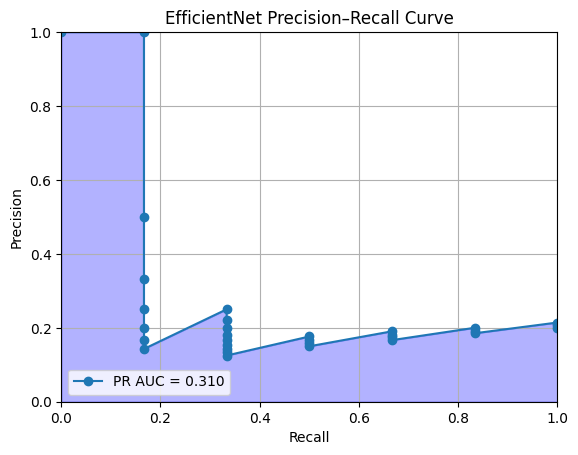

In [28]:
plot_auc_pr("EfficientNet", "siamese_fewshot",
            "efficientnet_CLASSIFICATION_2025-06-16_14-40-57.json", 0.31)

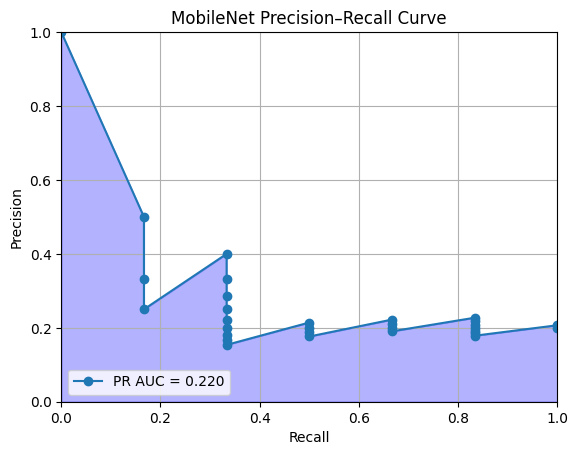

In [29]:
plot_auc_pr("MobileNet", "siamese_fewshot",
            "mobilenetv3_CLASSIFICATION_2025-06-16_14-40-47.json", 0.22)

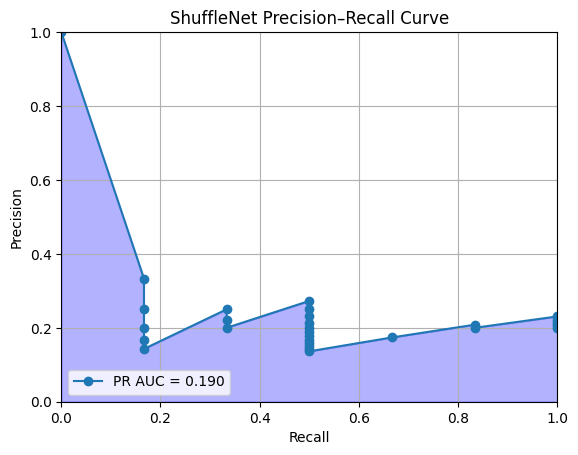

In [30]:
plot_auc_pr("ShuffleNet", "siamese_fewshot",
            "shufflenet_CLASSIFICATION_2025-06-16_14-40-38.json", 0.19)

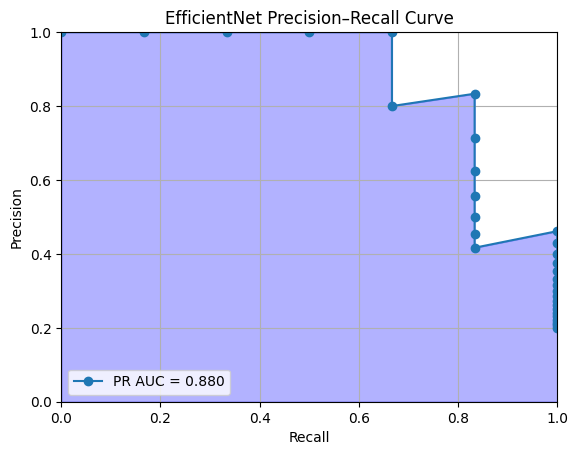

In [31]:
plot_auc_pr("EfficientNet", "efficientnet_roi_weighted_sampling",
            "efficientnet_AUC_ROC_2025-06-16_15-14-18.json", 0.88)

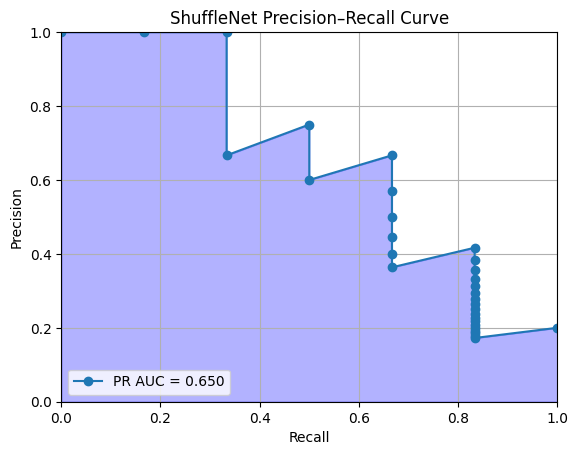

In [32]:
plot_auc_pr("ShuffleNet", "shufflenet_roi_weighted_sampling",
            "shufflenet_AUC_ROC_2025-06-16_15-14-26.json", 0.65)

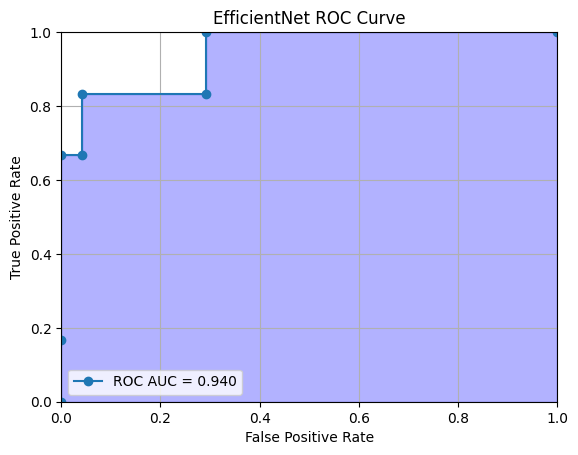

In [33]:
plot_auc_roc("EfficientNet", "efficientnet_roi_weighted_sampling",
             "efficientnet_AUC_ROC_2025-06-16_15-14-18.json", 0.94)

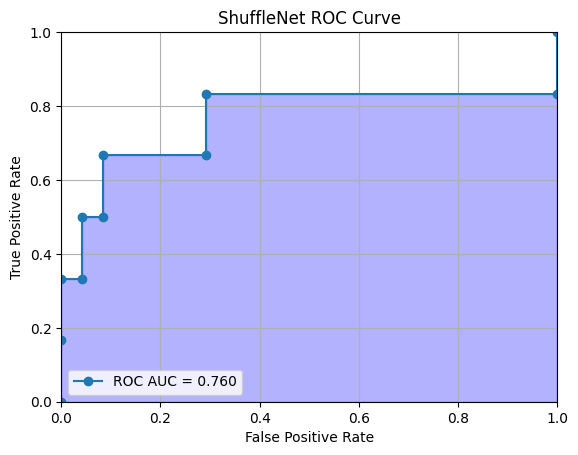

In [34]:
plot_auc_roc("ShuffleNet", "shufflenet_roi_weighted_sampling",
             "shufflenet_AUC_ROC_2025-06-16_15-14-26.json", 0.76)

In [36]:
def calculate_metrics(model: str, label: str, filename: str, threshold: float) -> None:
    with open(os.path.join(PATH_TO_RESULTS, label, filename)) as f:
        metrics = json.load(f)
        probs = metrics["probs"]
        labels = metrics["labels"]

        preds = [1 if prob >= threshold else 0 for prob in probs]
        accuracy = accuracy_score(labels, preds)
        precision = precision_score(labels, preds)
        recall = recall_score(labels, preds)
        f1 = f1_score(labels, preds)

        print(f"Model: {model}")
        print(f"Threshold: {threshold}")
        print(f"Accuracy: {accuracy:.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1 Score: {f1:.3f}")

In [37]:
calculate_metrics("EfficientNet", "efficientnet_roi_weighted_sampling",
                  "efficientnet_AUC_ROC_2025-06-16_15-14-18.json", 0.56)

Model: EfficientNet
Threshold: 0.56
Accuracy: 0.933
Precision: 1.000
Recall: 0.667
F1 Score: 0.800


In [38]:
calculate_metrics("ShuffleNet", "shufflenet_roi_weighted_sampling",
                  "shufflenet_AUC_ROC_2025-06-16_15-14-26.json", 0.47)

Model: ShuffleNet
Threshold: 0.47
Accuracy: 0.867
Precision: 1.000
Recall: 0.333
F1 Score: 0.500
